In [1]:
import pandas as pd

df = pd.read_csv("../data/tweets.csv")
df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
print("Forme du dataset :", df.shape)
df.info()


Forme du dataset : (7613, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
# Valeurs manquantes
missing = df.isnull().sum()
print("Valeurs manquantes :\n", missing)

# Doublons
duplicated = df.duplicated().sum()
print("Doublons :", duplicated)


Valeurs manquantes :
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Doublons : 0


count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


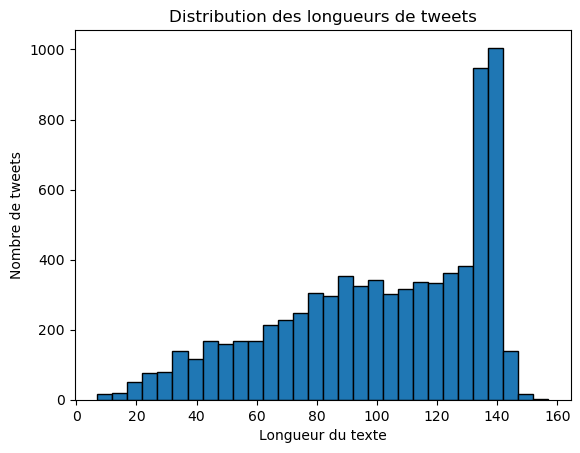

In [4]:
# Suppression des NaN dans 'text' pour les analyses suivantes
df['text'] = df['text'].fillna("")

df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

import matplotlib.pyplot as plt

plt.hist(df['text_length'], bins=30, edgecolor='black')
plt.title("Distribution des longueurs de tweets")
plt.xlabel("Longueur du texte")
plt.ylabel("Nombre de tweets")
plt.show()


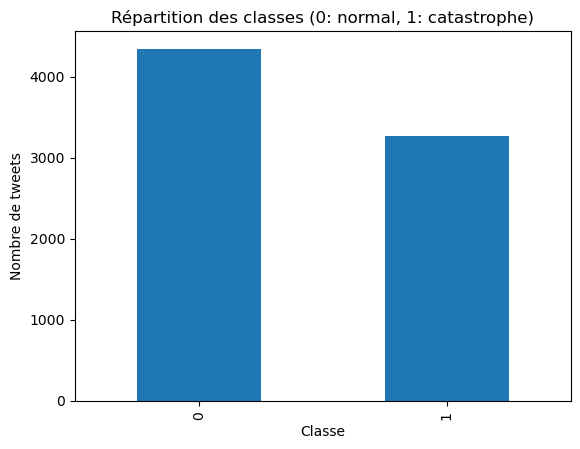

In [5]:
df['target'].value_counts().plot(kind='bar', title="Répartition des classes (0: normal, 1: catastrophe)")
plt.xlabel("Classe")
plt.ylabel("Nombre de tweets")
plt.show()


In [6]:
df[['text', 'target']].sample(5, random_state=42)


,text,target
2644,So you have a new weapon that can cause un-ima...,1
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0
6845,in response to trauma Children of Addicts deve...,0


In [8]:
print(df.columns)
print(df.head())


Index(['id', 'keyword', 'location', 'text', 'target', 'text_length'], dtype='object')
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  text_length  
0       1           69  
1       1           38  
2       1          133  
3       1           65  
4       1           88  
